# Part 2: Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization (20 pts)

## Processing Speeches with SpaCy

In [60]:
#import packages
import spacy
from tqdm import tqdm
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nlp = spacy.load("en_core_web_sm")

In [3]:
# read in data and subset for speeches for years 2000 and beyond
sotu = pd.read_csv('data/SOTU.csv')
filtered_sotu = sotu[sotu['Year'] >= 2000.0]

In [4]:
# process speeches into text in a list format
text = []

for doc in tqdm(filtered_sotu['Text']):
    words = nlp(doc)
    text.append(words)

100%|██████████| 25/25 [00:22<00:00,  1.12it/s]


### Tokens vs Lemmas

In [4]:
# start with a single speech tokens
tokens_test = []
lemmas_test = []

for t in text[0]:
    if t.is_stop == False and t.is_punct == False and t.is_space == False and t.is_currency == False:
            tokens_test.append(t.lower_)
            lemmas_test.append(t.lemma_.lower())

In [5]:
# expand method to full set of text
tokens = []
lemmas = []

for doc in tqdm(text):
    for t in doc:
        if t.is_stop == False and t.is_punct == False and t.is_space == False and t.is_currency == False:
            tokens.append(t.lower_)
            lemmas.append(t.lemma_.lower())

100%|██████████| 25/25 [00:00<00:00, 230.43it/s]


In [6]:
# look at top 20 tokens
top_tokens = Counter(tokens).most_common(20)
top_tokens

[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

In [7]:
# look at top 20 lemmas
top_lemmas = Counter(lemmas).most_common(20)
top_lemmas

[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

/tmp/ipykernel_243/1387711719.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(top_token_df['tokens'], rotation=90, ha='center')
/tmp/ipykernel_243/1387711719.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(top_lemma_df['lemmas'], rotation=90, ha='center')


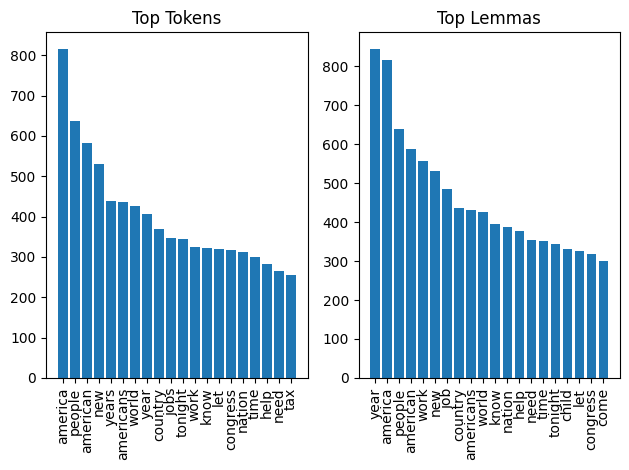

In [8]:
# extract info from top_tokens/top_lemmas lists
tokens, token_counts = zip(*top_tokens)
lemmas, lemma_counts = zip(*top_lemmas)

top_token_df = pd.DataFrame({
    'tokens': tokens,
    'token_counts': token_counts
})

top_lemma_df = pd.DataFrame({
    'lemmas': lemmas,
    'lemma_counts': lemma_counts
})

# plot the top tokens/lemmas to visualize a direct comparison
fig, axs = plt.subplots(nrows = 1, ncols = 2)

axs[0].bar(top_token_df['tokens'], top_token_df['token_counts'])
axs[0].set_title('Top Tokens')
axs[0].set_xticklabels(top_token_df['tokens'], rotation=90, ha='center') 

axs[1].bar(top_lemma_df['lemmas'], top_lemma_df['lemma_counts'])
axs[1].set_title('Top Lemmas')
axs[1].set_xticklabels(top_lemma_df['lemmas'], rotation=90, ha='center')

plt.tight_layout()
plt.show()

### Token vs Lemma Comparison

(compare year vs years vs year (lemma), child, etc)

## Common Words

In [9]:
# build function for common lemmas

def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """
    # subset the df for the specified year
    df = df[df['Year'] == year]

    # process text
    lemmas = []
    
    for i in tqdm(range(len(df))):
        text = df['Text'].iloc[i]
        tokens = nlp(text)
        for token in tokens:
            if token.is_stop == False and token.is_punct == False and token.is_space == False:
                lemmas.append(token.lemma_.lower())

    top_lemmas = Counter(lemmas).most_common(n)

    return top_lemmas

In [10]:
get_most_common_words(sotu, 2024.0)

100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29),
 ('pay', 29),
 ('come', 26),
 ('home', 25),
 ('family', 24),
 ('future', 23),
 ('million', 23),
 ('like', 21),
 ('build', 21),
 ('laughter', 20),
 ('americans', 20),
 ('history', 19),
 ('world', 19),
 ('right', 19),
 ('tax', 19),
 ('house', 18)]

### Compare 2023 and 2017 top words

In [11]:
# use defined function to pull the top words for 2023 and 2017
words_2023 = get_most_common_words(sotu, 2023.0, n=20)
words_2017 = get_most_common_words(sotu, 2017.0, n=20)

# set up the lists in data frame form for convenience of plotting like before
lemmas_2023, lemma_counts_2023 = zip(*words_2023)
lemmas_2017, lemma_counts_2017 = zip(*words_2017)

df_2023 = pd.DataFrame({
    'lemmas': lemmas_2023,
    'lemma_counts': lemma_counts_2023
})

df_2017 = pd.DataFrame({
    'lemmas': lemmas_2017,
    'lemma_counts': lemma_counts_2017
})

100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


In [12]:
# show counts by displaying both data frames
df_2023

,lemmas,lemma_counts
0,year,58
1,go,56
2,let,45
3,know,40
4,people,39
5,job,38
6,america,36
7,come,33
8,law,33
9,pay,33


In [13]:
df_2017

,lemmas,lemma_counts
0,american,34
1,america,29
2,country,26
3,nation,21
4,great,20
5,new,19
6,year,19
7,world,18
8,job,15
9,people,15


/tmp/ipykernel_243/826175005.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(df_2017['lemmas'], rotation=45, ha='right')
/tmp/ipykernel_243/826175005.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df_2023['lemmas'], rotation=45, ha='right')


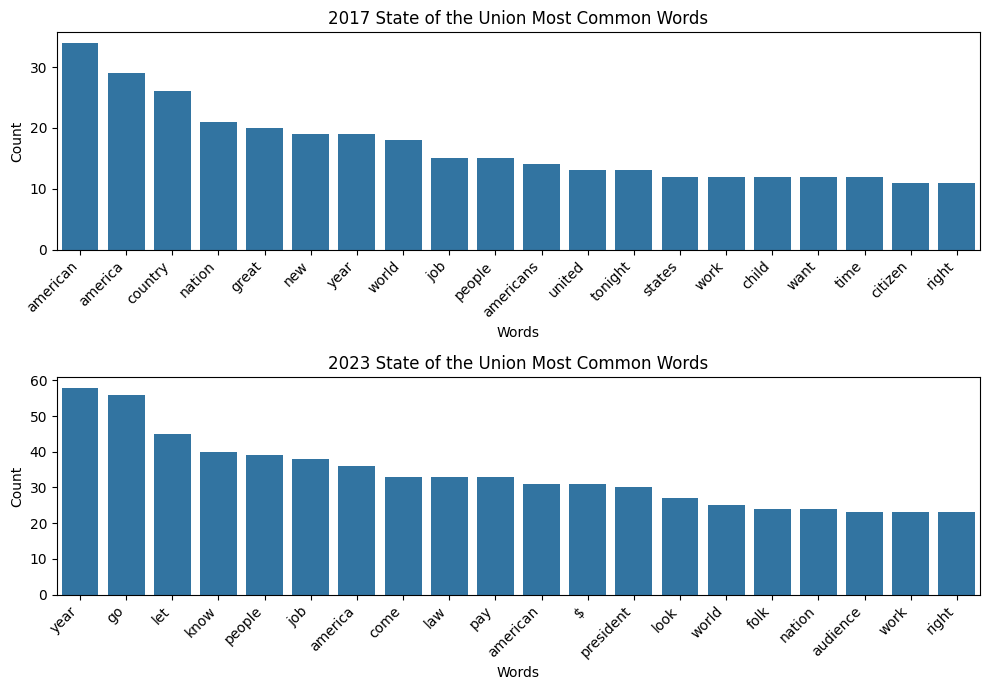

In [14]:
# make plots with seaborn

fig, axs = plt.subplots(2, 1, figsize = (10, 7))

sns.barplot(df_2017, x = df_2017['lemmas'], y = df_2017['lemma_counts'], ax = axs[0])
axs[0].set_title('2017 State of the Union Most Common Words')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(df_2017['lemmas'], rotation=45, ha='right') 

sns.barplot(df_2023, x = df_2023['lemmas'], y = df_2023['lemma_counts'], ax = axs[1])
axs[1].set_title('2023 State of the Union Most Common Words')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(df_2023['lemmas'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

## TF-IDF Vectorization

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [5]:
# collect raw text from a smaller portion of data to test idea (use filtered_sotu)
raw_filtered = filtered_sotu['Text'].to_list()

In [10]:
# set up vectorizor and run through fit_transform then reduce by running PCA through fit_transform to narrow down number of words
vectorizer = TfidfVectorizer(stop_words = 'english')
raw_matrix = vectorizer.fit_transform(raw_filtered).toarray()

pca = PCA(n_components=10)
reduced_matrix = pca.fit_transform(raw_matrix)

reduced_matrix.shape

(25, 10)

In [50]:
# make a function for vectorizing and pca

def tfidf_pca(data, n = 10):
    """inputs:
        - data: read in data 
        - n: number of components for pca

        outputs:
        - raw_matrix: matrix with speeches for rows and tokens for columns and values = tf-idf scores
        - reduced_matrix: matrix with speeches for rows and reduced components for columns and values = tf-idf scores
    """
    text = data['Text'].to_list()
    
    vectorizer = TfidfVectorizer() # stop words not removed
    raw_matrix = vectorizer.fit_transform(text).toarray()
    
    pca = PCA(n_components = n)
    reduced_matrix = pca.fit_transform(raw_matrix)

    return raw_matrix, reduced_matrix

In [51]:
# run the full data set through function and convert to dataframe for plotting

vect_matrix, pca_matrix = tfidf_pca(sotu, n = 2)

pca_df = pd.DataFrame(
    pca_matrix,
    columns=["PC1", "PC2"]
)

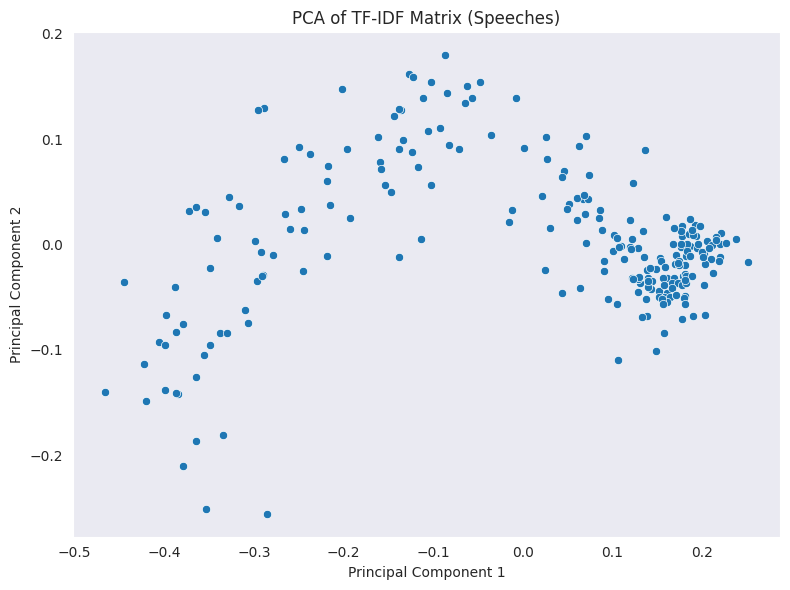

In [78]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.scatterplot(x = 'PC1', y = 'PC2', data = pca_df)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of TF-IDF Matrix (Speeches)")

plt.tight_layout()
plt.show()


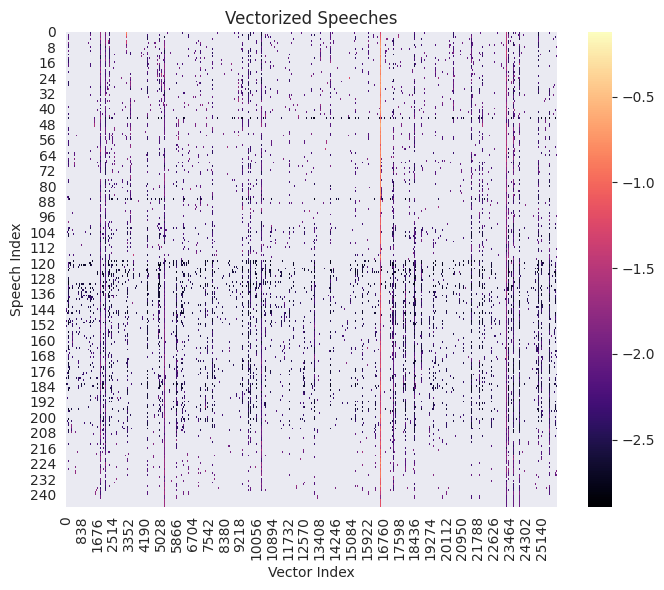

In [77]:
# to plot speech index vs vector index make new data frame
index_df = pd.DataFrame(
    vect_matrix,
    index=range(vect_matrix.shape[0]),          # speech indices
    columns=range(vect_matrix.shape[1])         # vector indices
)

# take log (add on a small constant to avoid approaching log(0)
log_index_df = np.log10(index_df + 1e-3)

# get rid of the many values at 0
masked_matrix = np.where(vect_matrix == 0, np.nan, vect_matrix)

# plot heatmap
plt.figure(figsize=(7, 6))
sns.set_style('dark')
sns.heatmap(
    log_index_df,
    cmap="magma",
    linewidths=0.0,
    mask = np.isnan(masked_matrix)
)
plt.title("Vectorized Speeches")
plt.xlabel("Vector Index")
plt.ylabel("Speech Index")
plt.tight_layout()
plt.show()


### Get the TF-IDF value for certain words and documents

In [79]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

In [ ]:
# write function to get index numbers using .vocabulary_ and idf scores
from sklearn.feature_extraction.text import CountVectorizer

def word_nums(data):
    """ input the data and output the index numbers for the words and the idf score of the words
    """
    text = data['Text'].to_list()

    #get counts for the words
    vectorizer = CountVectorizer()
    vect_count = vectorizer.fit_transform(text)

    word_nums = vectorizer.vocabulary_

    # get the idf scores 
    

In [ ]:
word_nums =  # get each word's index number using the .vocabular_ attributed of vectorizer

idf_score = ... # get their IDF score by using .idf_ at the indices from the previous step

tf_idf = ... # get the tf_idf score for the first speech

pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})